In [2]:
import plotly.graph_objects as go
import dash
from dash import html
from dash import dcc
from jupyter_dash import JupyterDash
from dash.dependencies import Input, Output
import pandas as pd

In [ ]:
# Create a dash application
app = JupyterDash(__name__)

# Read the airline data into pandas dataframe
airline_data =  pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/airline_data.csv', 
                            encoding = "ISO-8859-1",
                            dtype={'Div1Airport': str, 'Div1TailNum': str, 
                                   'Div2Airport': str, 'Div2TailNum': str})

#Create de application with JupyterDash
app = JupyterDash(__name__)

# Get the layout of the application and adjust it.
# Create an outer division using html.Div and add title to the dashboard using html.H1 component
# Add a html.Div and core input text component
# Finally, add graph component.
app.layout = html.Div(children=[html.H1('Airline Performance Dashboard',
                                        style={'textAlign':'center','color':'#503D36','font-size':40}),
                                html.Div(['Input Year: ',
                                         dcc.Input(id='input-year',
                                                   value = '2010',
                                                   type = 'number',
                                                   style={'height':'50px','font-size':35}
                                                  )
                                         ]),
                                html.Br(),
                                html.Br(),
                                
                                dcc.Graph(id='line-plot',style={'font-size':40})
                               ])

# add callback decorator
@app.callback(Output('area-plot', 'figure'),
              Input("input-year", "value")
             )

# Add computation to callback function and return graph
def get_graph(entered_year):
    
    #Select the year of interest
    df =  airline_data[airline_data['Year']==int(entered_year)]
    
    #Groupby month, get the mean of the ArrDelayMinutes and reset the index
    df = airline_data.groupby(['Month'])['ArrDelayMinutes'].mean().reset_index()
    
    fig = go.Figure(data = go.Scatter(x=df['Month'],y=df['ArrDelayMinutes'],mode='lines'))
    
    fig.update_layout(title = 'Average Delay Time per Month of year ' + str(entered_year) ,xaxis_title = 'Month',yaxis_title = 'Average Delay Time (Minutes)')
    return fig



if __name__ == '__main__':
    app.run_server(mode='inline',host = 'localhost')

# Image of Airline Performance Dashboard Line Plot

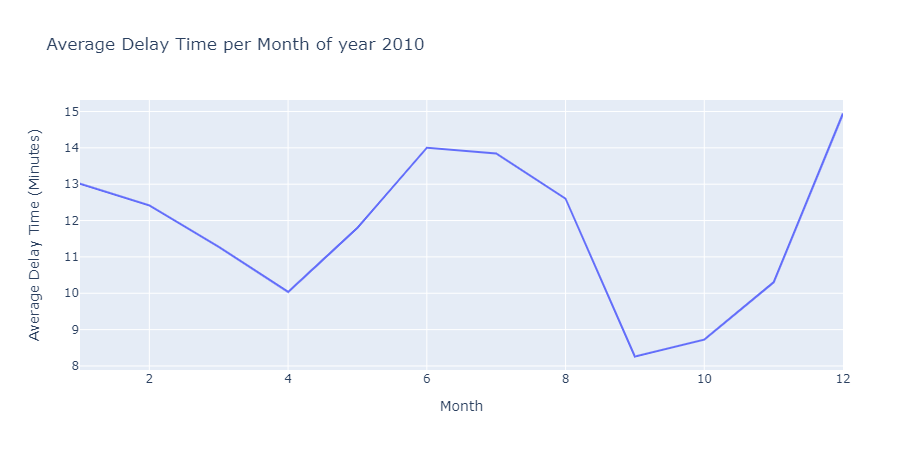

In [1]:
from IPython.display import Image
Image(filename='newplot2.png',width=800, height=500)